# $Problema 1$

Mandamos a llamar los notebooks en los cuales se enciantranlo codigos de loa integradores numericos de Runge Kutta a 2 y 4 orde, Euler a segundo grado, así como los metodos para obtener raices( Newton y bisección)

In [56]:
%run calculator.ipynb
%run Metodos_para_obtener_raices.ipynb
from scipy import *


In [2]:
def funcion_de_prueba(x,t):
    return array([x[1],-0.5*x[1]-sin(x[0]) + (e**-t) *sin(t)])

In [3]:
def Jac_fp(x,t):
    d_ec=array([0,3*(-e**-t)*cos(3*t)])
    du1dx=-cos(x[0])
    du2dt=-0.5
    j_ve=array([[0,1],[du1dx,du2dt]])
    return d_ec,j_ve


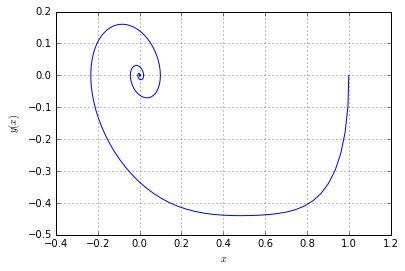

In [5]:
t,x=integra2(funcion_de_prueba,Jac_fp,[1,0],[0,100])
plot(x[:,0],x[:,1])
grid(True)
xlabel("$x(t)$"), ylabel("$y(t)$")
title("")
show()

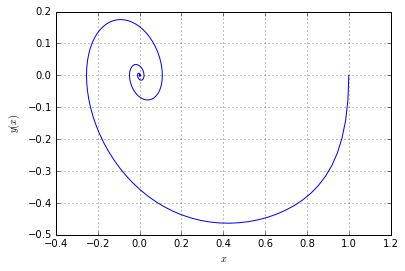

In [18]:
t,x= R_Kutta(funcion_de_prueba,[1,0],[0,100],0.1)
plot(x[:,0],x[:,1])
grid(True)
xlabel("$x$"), ylabel("$y(x)$")
show()

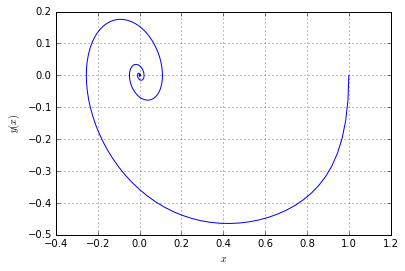

In [27]:
t,x= R_Kutta_4(funcion_de_prueba,[1,0],[0,100],0.1)
plot(x[:,0],x[:,1])
grid(True)
xlabel("$x$"), ylabel("$y(x)$")
show()

# $ Problema 2$


In [11]:
def f2(y,t):
    return array([y[1],y[2],-y[2]**2 +y[1]**3 -(cos(y[0]))**2 + (e**-t) *sin(3*t)])

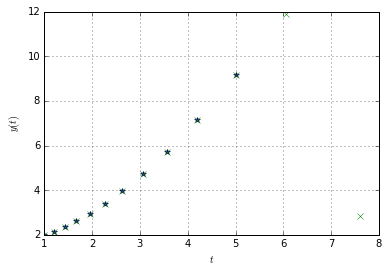

In [12]:
t,y= R_Kutta(f2,[1,2,1],[1,2],0.1)
t,y2= R_Kutta(f2,[1,2,1],[1,2.1],0.1)
plot(y[:,0],y[:,1],"*")
plot(y2[:,0],y2[:,1],"x")
grid(True)
xlabel("$t$"), ylabel("$y(t)$")
show()

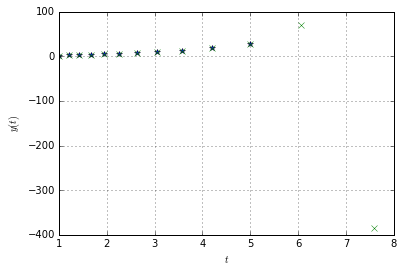

In [13]:
t,y= R_Kutta(f2,[1,2,1],[1,2],0.1)
t,y2= R_Kutta(f2,[1,2,1],[1,2.1],0.1)
plot(y[:,0],y[:,2],"*")
plot(y2[:,0],y2[:,2],"x")
grid(True)
xlabel("$t$"), ylabel("$y(t)$")
show()

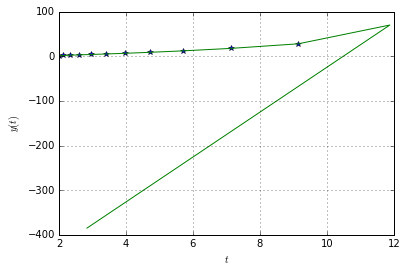

In [27]:
t,y= R_Kutta(f2,[1,2,1],[1,2],0.1)
t,y2= R_Kutta(f2,[1,2,1],[1,2.1],0.1)
plot(y[:,1],y[:,2],"*")
plot(y2[:,1],y2[:,2])
grid(True)
xlabel("$t$"), ylabel("$y(t)$")
show()

# $Problema 3$

In [33]:
def f1_mod(x,t,w):
    return array([x[1],-(0.1)*x[1] -4*sin(x[0]) + (0.5)*sin(w*t)])

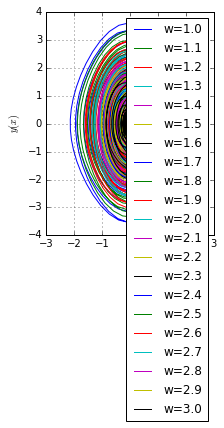

In [123]:
w=arange(1,3.1,0.1)

for i in w:
    
    t,x= R_Kutta_m(f1_mod,[1,0],[0,50],0.1,i)
    plot(x[:,0],x[:,1], label="w="+str(i))

axes().set_aspect('equal'),
grid(True)
xlabel("$x$"), ylabel("$y(x)$")
legend(loc=0)
show()

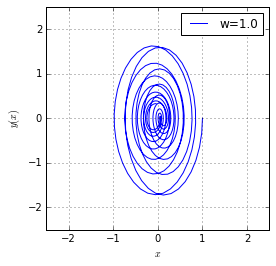

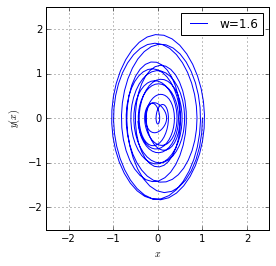

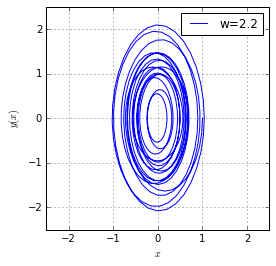

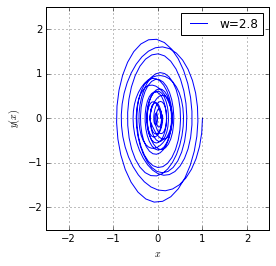

In [35]:
w=arange(1,3.1,0.6)

for i in w:
    
    t,x= R_Kutta_m(f1_mod,[1,0],[0,50],0.1,i)
    figure()
    plot(x[:,0],x[:,1], label="w="+str(i))
    zoom=2.5
    xlim([-zoom,zoom]), ylim([-zoom,zoom])
    axes().set_aspect('equal'),
    grid(True)
    xlabel("$x$"), ylabel("$y(x)$")
    legend(loc=0)
show()

Conforme aumenta el valor de w el las orbitas descritas por la función se puede apreciar como aumentan y decrementan periodicamente, esto es debido a que wt es el argumento del seno lo cual hace que oscile la amplitud de las orbitas.


# $Problema 4$

In [113]:
def f3(x,t):
    dx_dt= 10*(x[1] - x[0])
    dy_dt= x[0]*(28 -x[2])
    dz_dt=( x[0] * x[1]) - (8/3)*x[2]
    f3=array([dx_dt,dy_dt,dz_dt])
    return f3

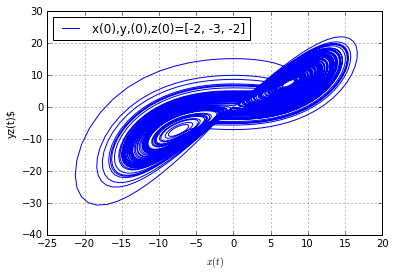

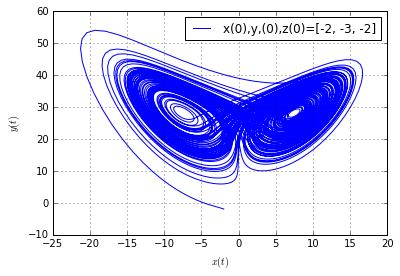

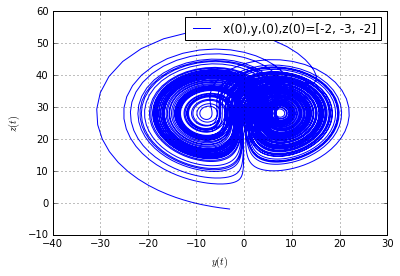

In [114]:
x=(random.randint(-5,5))
y=(random.randint(-5,5))
z=(random.randint(-5,5))
u=[x,y,z]
t,x= R_Kutta_4(f3,u,[0,100],0.01)

figure(1)
plot(x[:,0],x[:,1],label="x(0),y,(0),z(0)="+str(u))
grid(True)
xlabel("$x(t)$"), ylabel("yz(t)$")
legend(loc=0)


figure(2)
plot(x[:,0],x[:,2],label="x(0),y,(0),z(0)="+str(u))
grid(True)
xlabel("$x(t)$"), ylabel("$y(t)$")
legend(loc=0)


figure(3)
plot(x[:,1],x[:,2],label="x(0),y,(0),z(0)="+str(u))
grid(True)
xlabel("$y(t)$"), ylabel("$z(t)$")
legend(loc=0)
#axes().set_aspect('equal')

show()

La función dada se trata del atractor de Lorentz,el cual con los valores constantes dados se describe un comportamiento caotico, al variar las condiciones iniciales se obtienen trayectorias que divergen, aunque sea poca la diferncia de las condiciones iniciales no se asemejará el comportamiento de la trayectoria anterio, por ello se le considera un atractor extraño.

b)

Tomando 3 trayectorias somilares en las que solo la condición inicial en y para cada trayectoria varien 10^-2 


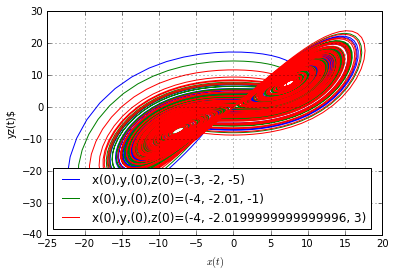

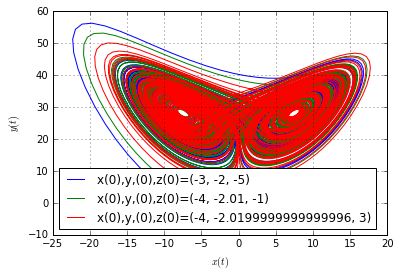

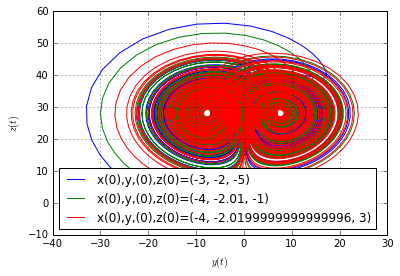

In [122]:

y1=(random.randint(-5,5))
y2=-(10**-2)+y1
y3=-(10**-2)+y2
Y=[y1,y2,y3]
for i in Y:
    
    x=(random.randint(-5,5))
    z=(random.randint(-5,5))
    u=(x,i,z)
    t,x= R_Kutta_4(f3,u,[0,100],0.01)
    figure()
    figure(1)
    plot(x[:,0],x[:,1],label="x(0),y,(0),z(0)="+str(u))
    grid(True)
    xlabel("$x(t)$"), ylabel("yz(t)$")
    legend(loc=0)


    figure(2)
    plot(x[:,0],x[:,2],label="x(0),y,(0),z(0)="+str(u))
    grid(True)
    xlabel("$x(t)$"), ylabel("$y(t)$")
    legend(loc=0)


    figure(3)
    plot(x[:,1],x[:,2],label="x(0),y,(0),z(0)="+str(u))
    grid(True)
    xlabel("$y(t)$"), ylabel("$z(t)$")
    legend(loc=0)
show()

Como anteriormente mencione el sistema es un atractor extraño en el cual apesar de que la diferencia de las condiciones iniciales sean minimas, como fue el caso que grafique con y1>y2>y3
 por una diferencia de $10^{-2}$ las trayectorias divergen considerablemente.